In [7]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.ion()

In [2]:
#loading and defining variable arrays
UKIRT_data=np.loadtxt('UKIRT.txt')
UKIRT=np.transpose(UKIRT_data)
ukirt_separation=(UKIRT[4][1:]).tolist()
ukirt_dmag=(UKIRT[8][1:]).tolist()
ukirt_separation.insert(0,0.97)
ukirt_dmag.insert(0,0)

In [3]:
speckle_separation=(np.arange(0.1,1.3,0.1)).tolist()
speckle_dmag=(np.array([4.64,5.64,6.1,6.1,6.1,6.15,6.2,6.25,6.25,6.25,6.25,6.25])-0.55).tolist()
speckle_separation.insert(0,0.04)
speckle_dmag.insert(0,4.25-0.55)
speckle_separation.insert(0,0.03)
speckle_dmag.insert(0,2.25-0.55)
speckle_separation.insert(0,0.03)
speckle_dmag.insert(0,0)

In [4]:
ao_separation=np.loadtxt('AOsep.txt')
ao_djmag=np.loadtxt('AOdjmag.txt')
Jp=13.379
Kp=17.131
J=Jp+ao_djmag
K=J+0.1918+J*0.08156
ao_dkmag=K-Kp
#setting zero point:
ao_separation[0]=ao_separation[2]
ao_separation[1]=ao_separation[2]

In [26]:
def plot_figure():
	#plotting the lines and setting graph size
	fig,ax=plt.subplots(figsize = (10,8))
	plt.plot(ukirt_separation,ukirt_dmag,linestyle='-')
	plt.plot(speckle_separation,speckle_dmag,linestyle='-',color='g')
	plt.plot(ao_separation,ao_dkmag,linestyle='-',color='darkcyan')
	plt.ylim(plt.ylim(0,6.5)[::-1])
	plt.xlim(0,3)
	plt.axhline(y=5.792,color='r')

	#labeling graph
	plt.xlabel('Separation (arcsec)',family='serif', fontsize = 'xx-large')
	plt.ylabel('Magnitude Difference',family='serif', fontsize = 'xx-large')

	#filling in exclusion zones
	ax.axhspan(5.8,7,alpha=0.2,facecolor='r',hatch='XXX',edgecolor='r')
	ax.axhspan(0,5.4,alpha=0.3,facecolor='white',hatch='///',edgecolor='black')
	ax.fill_between(ao_separation,ao_dkmag,0,hatch='///',facecolor='cyan',edgecolor='darkcyan',alpha=0.5)
	ax.fill_between(speckle_separation,speckle_dmag,0,facecolor='aquamarine',hatch='XXX',edgecolor='g',alpha=0.5)
	ax.fill_between(ukirt_separation,ukirt_dmag,0,facecolor='b',hatch='XXX',edgecolor='b',alpha=0.2)
	plt.show()

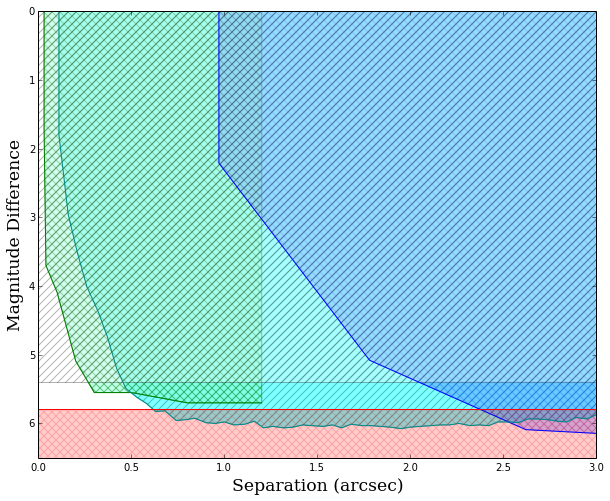

In [27]:
plot_figure()